# **Not an ideal network**

We follow a What+Why framework for each cell.



- What: Installing keras via pip package manager, Keras is a wrapper over Tensorflow. Then we import it for use
- Why: This package will help us define our DNN layer by layer

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


- What: Import each Library, Classes from Keras.layers will be used to define our network, also import mnist dataset and numpy.
- Why: We will be doing Mnist classification

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

We first use `help` to check the signature of the function. Using `help` command is going to be useful it seems.

- What: So It gets the mnist data partitioned into Train-Test set
- Why: Train-test split will be used to train and then test the model on test set

In [5]:
help(mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    # Arguments
        path: path where to cache the dataset locally
            (relative to ~/.keras/datasets).
    
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.



In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


- What:
  - We explore our data a little. 
  - We print number of training and test examples
  - We also show a example to see what our data looks like
  - `%matplotlib inline` commands makes the plots appear within our notebook
  
- Why
  - Knowing train and test size and data dimensions will help us design/debug our ConvNet
  
**Note** 
- the image looks color but it isn't, its just the way `plt.imshow` gives color to different cell values in a 2D matrix
- See that we have a single channel in the initial image, its a grayscale not RGB image.

(60000, 28, 28)
(10000, 28, 28)


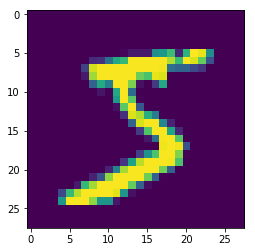

In [9]:
print (X_train.shape)
# add a line to print test set shape as well
print (X_test.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])


Once you change CMAP parameter we can see how it is a grayscale image

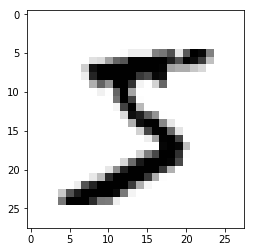

In [10]:
plt.imshow(X_train[0],cmap="binary")

What: We reshape to get single channel as dimension, the last 1 in each reshape is for the channel. Since the image is single channel so this is done. 

If image was 3 channel then

```python
X_train = X_train.reshape(X_train.shape[0], 28, 28,3)
```


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

What
- Convert datatype to float32, and normalize to 0-1 range

Why
- NNs can use only 0-1 data for our ConvNets, otherwise gradients will go to zero.
- float32 is used since gpu has 32 bit calculation units

Reference

https://devtalk.nvidia.com/default/topic/994172/how-to-tell-if-gpu-cores-are-actually-32-64-bit-processors/?offset=2

```

"Most GPUs have a native 32 bit integer multiply machine language instruction"

"The most commonly used criterion for an N-bit processor is the width of integer registers. Based on that, all "recent" NVIDIA GPUs (i.e. Tesla through Pascal architectures, 2007 through today), are 32-bit processors."

```

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

- Lets the spread of data to see if it is evenly spread. or some classes are more in number

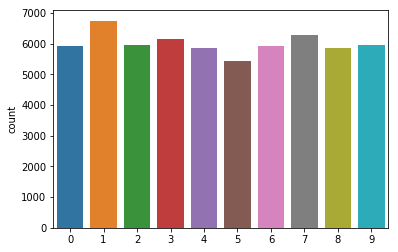

In [17]:

import seaborn as sns
sns.countplot(y_train)

In [18]:
help(np_utils.to_categorical)

Help on function to_categorical in module keras.utils.np_utils:

to_categorical(y, num_classes=None, dtype='float32')
    Converts a class vector (integers) to binary class matrix.
    
    E.g. for use with categorical_crossentropy.
    
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
        dtype: The data type expected by the input, as a string
            (`float32`, `float64`, `int32`...)
    
    # Returns
        A binary matrix representation of the input. The classes axis
        is placed last.



In [19]:
np_utils.to_categorical(range(0,10), 10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

What
- We do one hot encoding of the target labels for using categorical cross entropy loss.

Why
- Cross entropy loss function for multi-class problems requires your target labels to be one hot encoded.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [21]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Da Model!!

Possible ideas before we start

- Check receptive fields
- Check if Maxpool is used after atleast 2/3 layers.
- Check if channels,kernels,channel dimensions are ok
- Check if the number of channels are correct for each layer and if we are possibly losing info
- Count the total number of parameters in the network and see if network is overly complex.

In [22]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 

#  Input: width x height x num channels (depth) | Inputs receptive field width x height | parameters this layer

# 28 x 28 x 1 | 1x1 | 32x(3x3x1) = 288
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

# 26x26x32| 3x3 | 64x(3x3x32) = 18432
model.add(Convolution2D(64, 3, 3, activation='relu'))

# 24x24x64 | 5x5 | 128x(3x3x64) = 73728
model.add(Convolution2D(128, 3, 3, activation='relu'))


# 22x22x128| 7x7 | Maxpool layer has no params
model.add(MaxPooling2D(pool_size=(2, 2)))
# Maxpool halves the image in each dimension, so it increases receptive field by 2 times

# 11x11x128 | 14x14 | 256x(3x3x128) = 294912
model.add(Convolution2D(256, 3, 3, activation='relu'))

# 9x9x256 | 16x16 | 512x(3x3x256) = 1179648
model.add(Convolution2D(512, 3, 3, activation='relu'))

# 7x7x512 | 18x18 | 1024x(3x3x512) = 4718592
model.add(Convolution2D(1024, 3, 3, activation='relu'))

# 5x5x1024 | 20x20 | 2048x(3x3x1024) ~ 18x10^6 = 18 Million
model.add(Convolution2D(2048, 3, 3, activation='relu'))

# 3x3x2048 | 22x22 | 10x(3x3x2048) = 184320
model.add(Convolution2D(10, 3, 3, activation='relu'))

# Output from conv layers
# 1x1x10

# I now know how without using Fully Connected layers we can still do classification.
# Had asked in 1st class. :)
model.add(Flatten())

# Use softmax activation for giving probabilities.
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

What
- Compile the network with loss function and optimiser
- `metrics=['accuracy']` tells what to print as score after each epoch and as score when `model.evaluate` is called. We are concerned with accuracy.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 120s 2ms/step - loss: 1.6880 - acc: 0.2897
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.6391 - acc: 0.2980
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.6357 - acc: 0.2982
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.6324 - acc: 0.2988
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 1.6291 - acc: 0.2986
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.8187 - acc: 0.2428
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - a

**Observations**

- The accuracy is not increasing.
- The network is slow as shit, seems the network is overly complex

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [26]:
print(score)

[2.3025851249694824, 0.098]


In [0]:
y_pred = model.predict(X_test)

In [28]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


# What's wrong

- Receptive field at last layer was 22x22, we are not seeing the full image since image is 28x28
- Number of parameters is too huge.
- We use maxpool only once, which is why we have too many conv layers, we can use maxpool 2 times easily
- Too many conv layers lead to last layer having 2048 kernels and over 18 Million parameters for a single layer
- No image augmentation, Neither did we do any rotate or any other augmentation like changing brightness levels or invert colors (black to white n vice versa)

- The 1st Maxpool happens at 7x7 receptive field, it should be done at either 9x9 or 11x11, since at 7x7 receptive field the CNN may not be able identify any edges/gradients.

- We are not using blocks (conv-conv-conv-maxpool) style. 

- Our overall arch is 32->64->128->MP->256->512->1024->2048->Output layer. 

- A better way would be 
  - 1st block detect edges/grads as 32->64->128->MP (11x11x128 output)
  - 2nd block detect overall patterns 32->64->128->256->Output Layer.
  - The first block detects edges/gradients of 128 different types, the 2nd block we again start from 32 and proceed, 1st block gives 128 different types of edges, but since our overall labels are few, the number of patterns that can be created from these edges and gradients is also low. Hence we don't start our 2nd block with 256 but rather 32.
  
Please tell me if the `better way` I am saying is applicable or not?

# Make a correct network

## Double Max Pool

- Double max pool may hurt performance

In [51]:

model = Sequential() 

#  Input: width x height x num channels (depth) | Inputs receptive field width x height | parameters this layer

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 3, 3, activation='relu'))

# Output from conv layers
# 1x1x10

model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launche

Epoch 1/10
60000/60000 [==============================] - 14s 225us/step - loss: 1.4837 - acc: 0.4024
Epoch 2/10
60000/60000 [==============================] - 13s 220us/step - loss: 1.3783 - acc: 0.4091
Epoch 3/10
60000/60000 [==============================] - 13s 220us/step - loss: 1.3707 - acc: 0.4100
Epoch 4/10
60000/60000 [==============================] - 13s 219us/step - loss: 1.3676 - acc: 0.4105
Epoch 5/10
60000/60000 [==============================] - 14s 228us/step - loss: 1.3650 - acc: 0.4108
Epoch 6/10
60000/60000 [==============================] - 13s 217us/step - loss: 1.3632 - acc: 0.4112
Epoch 7/10
60000/60000 [==============================] - 13s 216us/step - loss: 1.3651 - acc: 0.4105
Epoch 8/10
60000/60000 [==============================] - 13s 218us/step - loss: 1.3629 - acc: 0.4110
Epoch 9/10
60000/60000 [==============================] - 13s 221us/step - loss: 1.3612 - acc: 0.4111
Epoch 10/10
60000/60000 [==============================] - 13s 215us/step - loss: 

## Block style architecture



### Style 1

- 1st block detect edges/grads as 32->64->128->MP (11x11x128 output)
- 2nd block detect overall patterns 32->64->128->256->Output Layer.

In [52]:

model = Sequential() 

#  Input: width x height x num channels (depth) | Inputs receptive field width x height | parameters this layer

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))

model.add(Convolution2D(10, 3, 3, activation='relu'))

# Output from conv layers
# 1x1x10

model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Con

Epoch 1/10
60000/60000 [==============================] - 15s 248us/step - loss: 1.4436 - acc: 0.4860
Epoch 2/10
60000/60000 [==============================] - 14s 236us/step - loss: 1.3946 - acc: 0.4994
Epoch 3/10
60000/60000 [==============================] - 14s 237us/step - loss: 1.3874 - acc: 0.5014
Epoch 4/10
60000/60000 [==============================] - 15s 245us/step - loss: 1.3821 - acc: 0.5024
Epoch 5/10
60000/60000 [==============================] - 14s 241us/step - loss: 1.3817 - acc: 0.5024
Epoch 6/10
60000/60000 [==============================] - 14s 236us/step - loss: 1.3786 - acc: 0.5031
Epoch 7/10
60000/60000 [==============================] - 14s 237us/step - loss: 1.3766 - acc: 0.5037
Epoch 8/10
60000/60000 [==============================] - 14s 236us/step - loss: 1.3764 - acc: 0.5035
Epoch 9/10
60000/60000 [==============================] - 14s 236us/step - loss: 1.3765 - acc: 0.5036
Epoch 10/10
60000/60000 [==============================] - 15s 251us/step - loss: 

### Style 2

- 1st block detect edges/grads as 32->64->128->256->256->MP (9x9x256 output)
- 2nd block detect overall patterns 32->64->128->Output Layer.

In [54]:

model = Sequential() 

#  Input: width x height x num channels (depth) | Inputs receptive field width x height | parameters this layer

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))


model.add(Convolution2D(10, 3, 3, activation='relu'))

# Output from conv layers
# 1x1x10

model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_lau

Epoch 1/10
60000/60000 [==============================] - 31s 512us/step - loss: 1.2318 - acc: 0.4916
Epoch 2/10
60000/60000 [==============================] - 30s 494us/step - loss: 1.1615 - acc: 0.5070
Epoch 3/10
60000/60000 [==============================] - 29s 484us/step - loss: 1.1491 - acc: 0.5090
Epoch 4/10
60000/60000 [==============================] - 29s 485us/step - loss: 1.1438 - acc: 0.5096
Epoch 5/10
60000/60000 [==============================] - 29s 489us/step - loss: 1.1422 - acc: 0.5097
Epoch 6/10
60000/60000 [==============================] - 29s 482us/step - loss: 1.1371 - acc: 0.5107
Epoch 7/10
60000/60000 [==============================] - 29s 488us/step - loss: 1.1367 - acc: 0.5106
Epoch 8/10
60000/60000 [==============================] - 29s 482us/step - loss: 1.1344 - acc: 0.5109
Epoch 9/10
60000/60000 [==============================] - 29s 481us/step - loss: 1.1342 - acc: 0.5109
Epoch 10/10
60000/60000 [==============================] - 29s 488us/step - loss: 

### Style 3

- 1st block detect edges/grads as 32->64->MP (12x12)
- 2nd Block 64->128->256->MP->Output

In [55]:

model = Sequential() 

#  Input: width x height x num channels (depth) | Inputs receptive field width x height | parameters this layer

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 3, 3, activation='relu'))

# Output from conv layers
# 1x1x10

model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  if sys.path[0] == '':
/

Epoch 1/10
60000/60000 [==============================] - 12s 192us/step - loss: 1.3516 - acc: 0.4357
Epoch 2/10
60000/60000 [==============================] - 11s 179us/step - loss: 1.2130 - acc: 0.4817
Epoch 3/10
60000/60000 [==============================] - 11s 179us/step - loss: 1.2071 - acc: 0.4825
Epoch 4/10
60000/60000 [==============================] - 11s 178us/step - loss: 1.2023 - acc: 0.4826
Epoch 5/10
60000/60000 [==============================] - 11s 177us/step - loss: 1.1999 - acc: 0.4836
Epoch 6/10
60000/60000 [==============================] - 11s 177us/step - loss: 1.1963 - acc: 0.4839
Epoch 7/10
60000/60000 [==============================] - 11s 188us/step - loss: 1.1948 - acc: 0.4842
Epoch 8/10
60000/60000 [==============================] - 11s 179us/step - loss: 1.1939 - acc: 0.4844
Epoch 9/10
60000/60000 [==============================] - 11s 176us/step - loss: 1.1931 - acc: 0.4845
Epoch 10/10
60000/60000 [==============================] - 11s 177us/step - loss: 

In [0]:

model = Sequential() 

#  Input: width x height x num channels (depth) | Inputs receptive field width x height | parameters this layer

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 3, 3, activation='relu'))

# Output from conv layers
# 1x1x10

model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

### Style 4 (Funnel shape of kernels)



In [56]:

model = Sequential() 

#  Input: width x height x num channels (depth) | Inputs receptive field width x height | parameters this layer

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))


model.add(Convolution2D(10, 3, 3, activation='relu'))

# Output from conv layers
# 1x1x10

model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_lau

Epoch 1/10
60000/60000 [==============================] - 40s 674us/step - loss: 1.7202 - acc: 0.3664
Epoch 2/10
60000/60000 [==============================] - 39s 643us/step - loss: 1.6737 - acc: 0.3779
Epoch 3/10
60000/60000 [==============================] - 39s 642us/step - loss: 1.4532 - acc: 0.3805
Epoch 4/10
60000/60000 [==============================] - 39s 643us/step - loss: 1.2784 - acc: 0.4554
Epoch 5/10
60000/60000 [==============================] - 38s 639us/step - loss: 1.2146 - acc: 0.4806
Epoch 6/10
60000/60000 [==============================] - 39s 642us/step - loss: 1.2113 - acc: 0.4806
Epoch 7/10
60000/60000 [==============================] - 38s 639us/step - loss: 1.2066 - acc: 0.4814
Epoch 8/10
60000/60000 [==============================] - 38s 641us/step - loss: 1.2047 - acc: 0.4816
Epoch 9/10
60000/60000 [==============================] - 39s 643us/step - loss: 1.2074 - acc: 0.4810
Epoch 10/10
60000/60000 [==============================] - 38s 641us/step - loss: 

### Style 5 (Another funnel shape)

In [57]:

model = Sequential() 

#  Input: width x height x num channels (depth) | Inputs receptive field width x height | parameters this layer

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))

model.add(Convolution2D(10, 3, 3, activation='relu'))

# Output from conv layers
# 1x1x10

model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `C

Epoch 1/10
60000/60000 [==============================] - 23s 377us/step - loss: 2.2850 - acc: 0.1079
Epoch 2/10
60000/60000 [==============================] - 22s 360us/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 22s 363us/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 21s 355us/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 21s 355us/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 21s 356us/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 22s 362us/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 21s 355us/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 21s 355us/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 22s 358us/step - loss: 

### Drastically reduced params model

In [58]:

model = Sequential() 

#  Input: width x height x num channels (depth) | Inputs receptive field width x height | parameters this layer

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 11x11

model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(Convolution2D(10, 3, 3, activation='relu'))

# Output from conv layers
# 1x1x10

model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launch

Epoch 1/10
60000/60000 [==============================] - 13s 215us/step - loss: 1.3273 - acc: 0.5374
Epoch 2/10
60000/60000 [==============================] - 12s 192us/step - loss: 1.0060 - acc: 0.6718
Epoch 3/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.9632 - acc: 0.6873
Epoch 4/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.9565 - acc: 0.6883
Epoch 5/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.9513 - acc: 0.6898
Epoch 6/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.9481 - acc: 0.6905
Epoch 7/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.9462 - acc: 0.6911
Epoch 8/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.9445 - acc: 0.6915
Epoch 9/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.9443 - acc: 0.6918
Epoch 10/10
60000/60000 [==============================] - 12s 200us/step - loss: 

In [59]:
model = Sequential() 

#  Input: width x height x num channels (depth) | Inputs receptive field width x height | parameters this layer

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 12x12

model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))

# Output from conv layers
# 1x1x10

model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarni

Epoch 1/10
60000/60000 [==============================] - 11s 177us/step - loss: 1.4326 - acc: 0.3987
Epoch 2/10
60000/60000 [==============================] - 10s 160us/step - loss: 1.2251 - acc: 0.4765
Epoch 3/10
60000/60000 [==============================] - 10s 160us/step - loss: 1.1563 - acc: 0.5031
Epoch 4/10
60000/60000 [==============================] - 10s 170us/step - loss: 1.1522 - acc: 0.5042
Epoch 5/10
60000/60000 [==============================] - 10s 164us/step - loss: 1.1488 - acc: 0.5047
Epoch 6/10
60000/60000 [==============================] - 10s 160us/step - loss: 1.1483 - acc: 0.5045
Epoch 7/10
60000/60000 [==============================] - 10s 160us/step - loss: 1.1452 - acc: 0.5049
Epoch 8/10
60000/60000 [==============================] - 10s 160us/step - loss: 1.0518 - acc: 0.5464
Epoch 9/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.9217 - acc: 0.6022
Epoch 10/10
60000/60000 [==============================] - 10s 160us/step - loss: 

# Pytorch

work in progress

# What's wrong (Repeated cell for convinience)

- Receptive field at last layer was 22x22, we are not seeing the full image since image is 28x28
- Number of parameters is too huge.
- We use maxpool only once, which is why we have too many conv layers, we can use maxpool 2 times easily
- Too many conv layers lead to last layer having 2048 kernels and over 18 Million parameters for a single layer
- No image augmentation, Neither did we do any rotate or any other augmentation like changing brightness levels or invert colors (black to white n vice versa)

- The 1st Maxpool happens at 7x7 receptive field, it should be done at either 9x9 or 11x11, since at 7x7 receptive field the CNN may not be able identify any edges/gradients.

- We are not using blocks (conv-conv-conv-maxpool) style. 

- Our overall arch is 32->64->128->MP->256->512->1024->2048->Output layer. 

- A better way would be 
  - 1st block detect edges/grads as 32->64->128->MP (11x11x128 output)
  - 2nd block detect overall patterns 32->64->128->256->Output Layer.
  - The first block detects edges/gradients of 128 different types, the 2nd block we again start from 32 and proceed, 1st block gives 128 different types of edges, but since our overall labels are few, the number of patterns that can be created from these edges and gradients is also low. Hence we don't start our 2nd block with 256 but rather 32.
  
Please tell me if the `better way` I am saying is applicable or not?